In [3]:
%load_ext autoreload

%autoreload 2

import os
from glob import glob
import subprocess
import shutil
import traceback
import random
import pickle
from os.path import join

import joblib
from concurrent.futures import ProcessPoolExecutor
import re

from backports import tempfile

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 144
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

import psrchive
from astropy.io import fits

import pipe

plt.viridis()

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [24]:
pam = pipe.PsrchiveCommand("pam", infiles=[0], outfiles=["output"], inplace={0:"output"}, always_args=["-m"])
paz = pipe.PsrchiveCommand("paz", infiles=[0], outfiles=["output"], inplace={0:"output"}, always_args=["-m"])

In [25]:
pam("/tmp/tripletest/raw_0001.fits", output="/tmp/tripletest/psc.fits", 
    p=None)

/tmp/tripletest/psc.fits written to disk


In [27]:
paz("/tmp/tripletest/raw_0001.fits", output="/tmp/tripletest/zap.fits", 
    r=None, R="20")

INFO:root:No old arguments on record
INFO:root:Arguments changed
DEBUG:root:(['/tmp/tripletest/raw_0001.fits'], {'output': '/tmp/tripletest/zap.fits', 'R': '20', 'r': None}) != ([], {})
INFO:root:Input /tmp/tripletest/zap.fits.args newer than /tmp/tripletest/zap.fits.stderr
DEBUG:root:Mon Jan 30 18:46:39 2017 > Mon Jan 30 18:45:10 2017
DEBUG:root:Inplace replacing position 0=/tmp/tripletest/raw_0001.fits with keyword output=/tmp/tripletest/zap.fits


Using median smoothed difference zapper
Equivalent paz cmd: paz -z "0 1 2 94 95 96 99 104 175 176 177 178 180 181 222 280 281 292 304 323 324 325 328 329 330 332 333 334 335 336 337 338 460 461 462 463 464 465"
Equivalent paz cmd: paz -z "0 1 2 52 94 95 96 99 100 104 175 176 177 178 180 181 222 273 274 280 281 285 293 294 304 323 324 325 328 329 330 332 333 334 335 336 337 338 460 461 462 463 464"
Equivalent paz cmd: paz -z "0 1 2 95 96 175 177 180 181 222 273 291 293 294 304 305 323 324 325 328 329 332 333 334 335 336 337 338 460 461 463 464"
Equivalent paz cmd: paz -z "0 1 2 95 96 175 177 178 180 181 222 280 291 292 293 294 304 305 323 324 325 332 333 334 335 336 337 460 461 463 464"
Equivalent paz cmd: paz -z "0 1 2 95 96 180 222 279 280 292 293 294 304 305 323 324 325 332 333 335 336 460 461 463 464"
Equivalent paz cmd: paz -z "0 1 2 9 95 96 222 280 281 291 292 293 294 304 305 323 324 325 332 333 335 336 460 461 463 464 504"
Equivalent paz cmd: paz -z "0 1 2 9 95 96 222 280 281 291

In [7]:
np.searchsorted?

In [2]:
pickle.dump?

In [5]:
repr(1+np.finfo(np.longdouble).eps)

'1.0000000000000000001'

In [6]:
float(1+np.finfo(np.longdouble).eps)

1.0

In [8]:
np.__file__

'/export/astron/archibald/.local/lib/python2.7/site-packages/numpy/__init__.pyc'

In [22]:
# make a symlink "copy" of a directory tree
# directories are real, files are symlinks

def split(path):
    p = path.split("/")
    if p[0]=="":
        p[0] = "/"
    return p

source = "/psr_archive/hessels/archibald/0337+17"
destination = "/data/archibald/0337+1715"
source_split = split(source)
for dirName, subdirList, fileList in os.walk(source):
    dn_split = split(dirName)
    assert dn_split[:len(source_split)] == source_split, "destination %s is weird" % (dn_split,)
    rel_dn = dn_split[len(source_split):]
    target_dn = join(destination,*rel_dn)
    if not os.path.exists(target_dn):
        os.mkdir(target_dn)
        #print "mkdir", target_dn
    for f in fileList:
        sf, tf = join(dirName, f), join(target_dn,f) 
        os.symlink(sf, tf)
        #print "symlink", sf, "->", tf

In [21]:
os.mkdir?

In [34]:
#F = psrchive.Archive_load("data/obs/56477.53_AO_1400/singlefrequency/scrunch_0000.ar")
F = psrchive.Archive_load("data/obs/56494.49_GBT_1400/onescintle/scrunch_0000.ar")
I = F.get_Integration(0)
F_fits = fits.open("data/obs/56494.49_GBT_1400/onescintle/scrunch_0000.ar")

In [23]:
F.get_telescope()

'GBT'

In [24]:
E = I.get_epoch()

In [25]:
E.intday(), E.fracday()

(56494, 0.4886506586585616)

In [26]:
I.get_folding_period()

0.002732301836043067

In [27]:
I.weighted_frequency(0)

1510.6408344515858

In [28]:
F.get_weights().shape

(2, 128)

In [29]:
I.get_duration()

655.9680000000005

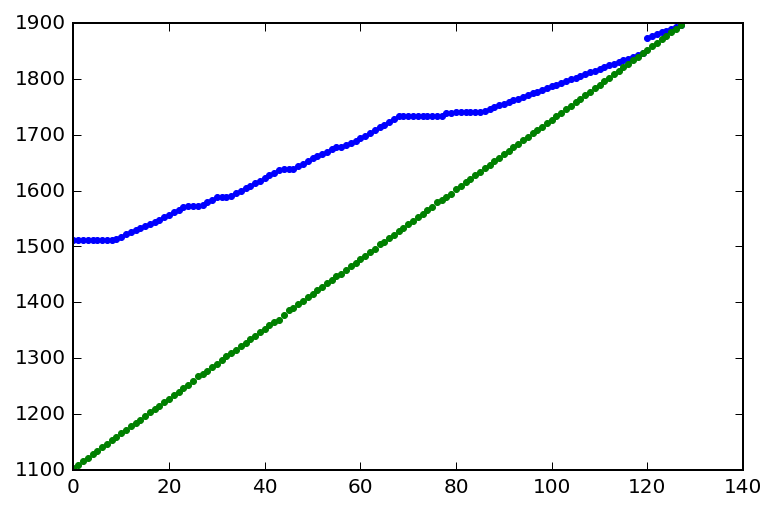

In [35]:
wfs = [I.weighted_frequency(i) for i in range(F.get_nchan())]
plt.plot(wfs,".")
plt.plot(F_fits['SUBINT'].data['DAT_FREQ'][0],".")


In [38]:
print [I.weighted_frequency(i) for i in range(F.get_nchan())][:10]
print F_fits['SUBINT'].data['DAT_FREQ'][0][:10]


[1510.6408344515858, 1510.6408344515858, 1510.6408344515858, 1510.6408344515858, 1510.6408344515858, 1510.6408344515858, 1510.6408344515858, 1510.6408344515858, 1510.6408344515858, 1512.784289665465]
[ 1102.34375  1108.59375  1114.84375  1121.09375  1127.34375  1133.59375
  1139.84375  1146.09375  1153.90625  1158.59375]


In [1]:
import residuals

In [2]:
r = residuals.read_residuals()

In [5]:
pipe.read_manual_zap("data/obs/56015.80_AO_1400/raw_0002.ar.paz")

([5, 6, 7, 8, 9, 10, 11, 12, 13], [])

In [6]:
F = psrchive.Archive_load("data/obs/55962.26_GBT_1400/raw_0000.ar")

In [ ]:
F.get_